Sam Deleu

Opdracht: Sessie 1: Neurale netwerken

# Deep learning -  Opdracht sessie 01 - neurale netwerken

## Doelstelling van de opdracht

Deep learning is onovertroffen in het extraheren van informatie uit grote hoeveelheden data. Als subdomein binnen de machine learning zorgt het ervoor dat praktische toepassingen die vroeger als sciencefiction werden beschouwd realiteit worden. Denk maar aan betere preventieve gezondheidszorg, self-driving cars, performante recommendation systems, CSI style beeldverwerking, machine translations, etc.

De onderliggende technologie van de verschillende deep learning architecturen zijn de zogenaamde neurale netwerken.
Het is daarom essentiëel een goed inzicht te verkrijgen in de mechanismen en parameters van deze neurale netwerken.

Bij deze opdracht zullen feedforward neurale netwerken in Keras worden gebouwd voor het uitvoeren van classificatietaken.

De warm-up oefening is vooral bedoeld om inzicht te verkrijgen in de invloed en rol van de verschillende hyperparameters. Deze oefening wordt stap voor stap opgebouwd. Belangrijk zijn niet zozeer de uiteindelijk accuracy cijfers, maar de conclusies en inzichten die in dit document worden neergeschreven.

Bij de andere oefeningen wordt van de student verwacht om zelfstandig een performante pipeline te kunnen opzetten van ruwe data tot en met een performante classificatie.


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import (
    make_blobs,
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
)

from sklearn.preprocessing import StandardScaler

import matplotlib.image as mpimg
from skimage.io import imread, imshow

# distributions
from scipy.stats import randint 
from scipy.stats import uniform


# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

###### Voor Tensorflow-GPU ########

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Warm-up

Hieronder worden 1000 random samples gegenereerd (getrokken uit vier Gaussiaanse verdelingen). De data bestaat uit 2 features en elke sample behoort tot één van de vier klasses.
Gebruik deze data om een neuraal netwerk te trainen dat als classifier optreedt.
De volledige datapipeline van deze opdracht is hieronder beschikbaar. De bedoeling is om de invloed van de hyperparameters uit te testen en de conclusies neer te schrijven in dit document. De vragen kan je onder de voorbeeldcode terugvinden.

In [7]:
X, y = make_blobs(n_samples=1000, centers=4, center_box = [-10,10],
                  random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y);

InvalidParameterError: The 'center_box' parameter of make_blobs must be an instance of 'tuple'. Got [-10, 10] instead.

In [4]:
# splitsen in test set en training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# ---------------------------------------------------
# normaliseren van de input data

#scaler = StandardScaler()

#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#----------------------------------------------------
# one-hot encoding op output
y_train = to_categorical(y_train)
print(y_train)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# NN parameters

batch_size = 32
epochs = 100
dropoutrate = 0.0
input_dim = X_train.shape[1]
activation_hidden = 'relu' # activatiefunctie van de hidden layer neuronen
activation_output = 'sigmoid'# activatie van de output layer neuronen
initializer = 'RandomUniform' # type van kernel intializer
SGD = tf.keras.optimizers.SGD(lr=0.3)
adam = tf.optimizers.Adam()
model = Sequential()
model.add(Dense(20, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(20, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(20, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(20, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(y_train.shape[1], kernel_initializer=initializer,activation=activation_output))


model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

# train the model

history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2,verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1.3863 - accuracy: 0.2516 - val_loss: 1.3861 - val_accuracy: 0.2812
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3858 - accuracy: 0.3047 - val_loss: 1.3849 - val_accuracy: 0.3688
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3804 - accuracy: 0.4250 - val_loss: 1.3708 - val_accuracy: 0.4313
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3378 - accuracy: 0.4969 - val_loss: 1.2860 - val_accuracy: 0.5562
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1859 - accuracy: 0.5156 - val_loss: 1.0803 - val_accuracy: 0.4625
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.4938 - val_loss: 0.9305 - val_accuracy: 0.4750
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8959 - accuracy: 0.5734 - val_loss: 0.8749 - val_accuracy: 0.4750
Epoch 8/100
2

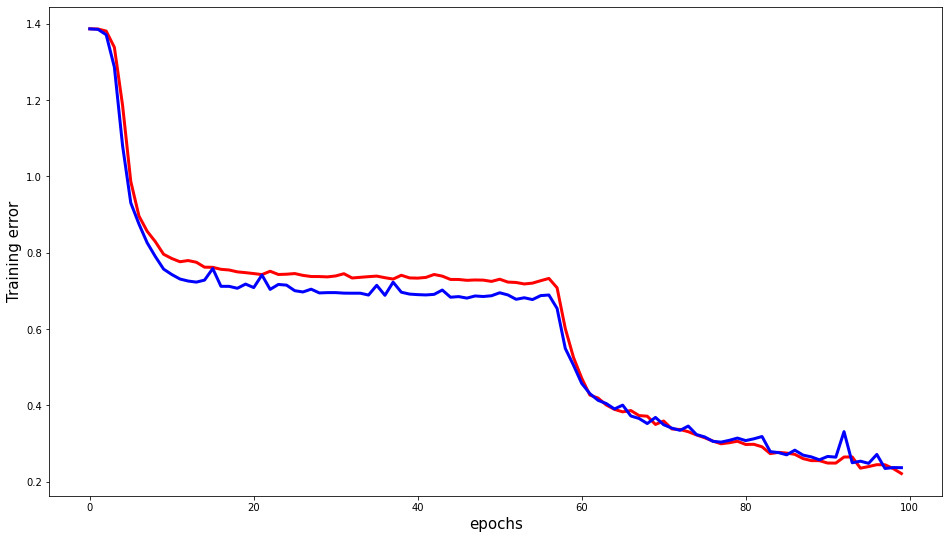

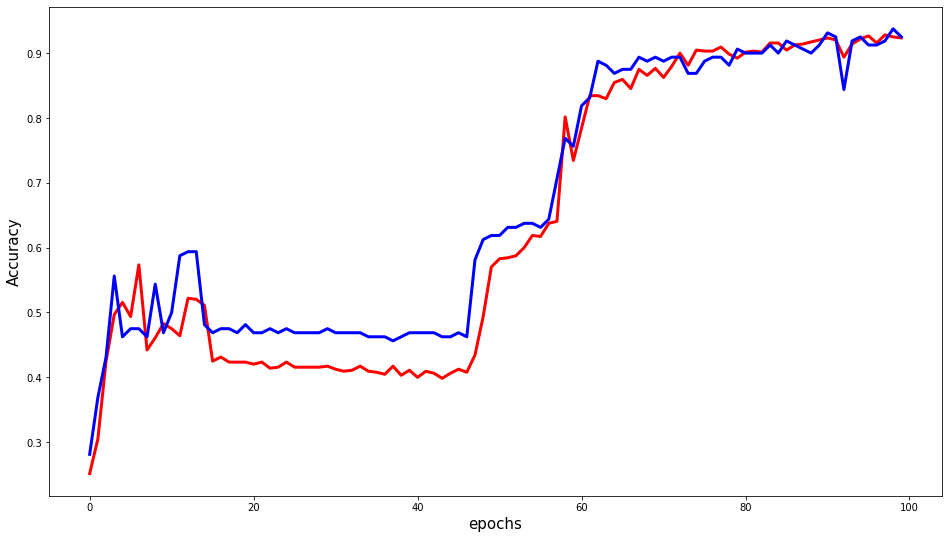

In [6]:
# Plot history

fig = plt.figure(figsize=(16,9))
plt.rcParams['axes.labelsize'] = 15
plt.plot(history.history['loss'],'red',linewidth=3.0)
plt.plot(history.history['val_loss'],'blue',linewidth=3.0)
plt.xlabel('epochs')
plt.ylabel('Training error')
plt.show()
fig = plt.figure(figsize=(16,9))
plt.rcParams['axes.labelsize'] = 15
plt.plot(history.history['accuracy'],'red',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'blue',linewidth=3.0)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(-4.14847939486199, 12.251520605138023)

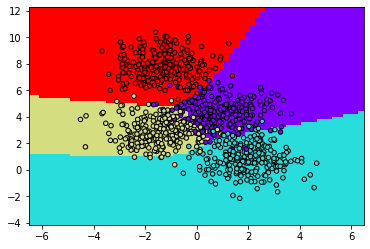

In [7]:
# Plotten van de decision boundary

h = 0.2
x1_min = X[:,0].min()-2
x1_max = X[:,0].max()+2
x2_min = X[:,1].min()-2
x2_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T

xys = xy
#xys = scaler.transform(xy)

Zn = model.predict_classes(xys).reshape(xx.shape)

plt.pcolormesh(xx,yy, Zn,cmap='rainbow')
plt.scatter(X[:, 0], X[:, 1], c=y,edgecolor='k', s=20,cmap='rainbow')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [8]:
# Testen met test set

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 



              precision    recall  f1-score   support

           0       0.80      0.75      0.78        44
           1       0.98      0.96      0.97        51
           2       0.84      0.88      0.86        48
           3       0.95      0.98      0.97        57

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200

[[33  1  8  2]
 [ 2 49  0  0]
 [ 5  0 42  1]
 [ 1  0  0 56]]
90.0


### Opdrachten warm-up oefening

1. Varieer bij SGD de learning rate en onderzoek wat er gebeurt wanneer deze te klein of te groot wordt. Wat is de invloed van normalisatie op de learning rate en de plot van de model loss?
2. Probeer verschillende optimizers uit: SGD, Adam, RMSProp, Adagrad, ... (https://keras.io/optimizers/). Kijk wat er gebeurt in termen van de model loss curve en de accuracy.
3. Kies een dropoutrate van 0.8. Verklaar wat er gebeurt. Zet nadien de dropout rate terug naar 0.0
4. Verhoog het aantal neuronen in de hidden layers. Wat is de invloed daarvan?
5. Verhoog het aantal hidden layers. Wat merk je? Bekijk de decision boundary. Controleer of je met overfitting te maken hebt. Verhoog nu de dropout rate. Verklaar wat er gebeurt.
6. Bespreek de invloed van batchnormalization.
7. Probeer verschillende activatiefuncties uit bij de hidden layers. (https://keras.io/activations/)
8. Probeer verschillende initializers. (https://keras.io/initializers/)
9. Doe hyperparameter tuning via grid search, random search en bayes optimization. Wat is de finale accuracy die je haalt op de test set?


In [ ]:
# Uitwerking van de opdrachten




## Customer satisfaction

Een bank probeert vroegtijdig ontevreden klanten op te sporen en wil daarvoor deep learning toepassen.
Gegeven is een dataset "customersatisfaction.csv" met geanonimiseerde gegevens van hun klanten en de bijhorende klantentevredenheid. De features zelf werden ook geanonimiseerd.
De target kolom is de variabele die voorspeld moet worden. 1 staat voor ontevreden klanten, 0 staat voor tevreden klanten.

Train een neuraal netwerk dat een zo hoog mogelijke accuraatheid haalt. 
Zorg dat er 10000 samples in de test set aanwezig zijn en zet de random_state op 0.

In [ ]:
dataset = pd.read_csv('./customersatisfaction.csv')

dataset.head(10)

In [ ]:
# Uitwerking opdracht customer satisfaction



## Zalando 

Fashion-MNIST is een dataset van Zalando bestaande uit afbeeldingen van kledij. De training set ('fashion-mnist_train.csv') bestaat uit 60000 afbeeldingen, de test set ('fashion-mnist_test.csv') uit 10000 afbeeldingen.
Elke grijsafbeelding is 28x28 pixels groot en is toegewezen aan één van de 10 klasses: 

0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'.

Train een neuraal netwerk dat een zo hoog mogelijke accuracy score behaalt op de test set.
Eén optie is om als features de ruwe pixeldata (784 pixels) te gebruiken. Een andere benadering is om via Principle Component Analysis (PCA) de featureset te reduceren en daarmee als het ware feature extraction toe te passen.
Onderzoek welke afbeeldingen niet correct werden geclassificeerd en visualiseer ze.

Tijdens de volgende sessie zullen we op dezelfde dataset convolutional neural networks toepassen. Deze neurale netwerk architectuur leent zich uitstekend voor image classification.

Vergelijk jouw eigen accuracy score met deze opgelijst op https://github.com/zalandoresearch/fashion-mnist.


In [ ]:
df_train = pd.read_csv('./fashion-mnist_train.csv')
df_test = pd.read_csv('./fashion-mnist_test.csv')
df_train.head()

In [ ]:
# Uitwerking Zalando oefening

